In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Underfiting e Overfiting

Underfitting é uma tradução para o inglês de sub-ajustado. Ou seja, nosso modelo não conseguiu aprender suficiente sobre os dados. O underfitting leva à um erro elevado tanto nos dados de treino quando nos dados de teste.

Overfitting é o oposto. O termo vem da tradução de sobre-ajustado. É quando o modelo aprende demais sobre os dados. Neste caso, o modelo mostra-se adequado apenas para os dados de treino, como se o modelo tivesse apenas decorado os dados de treino e não fosse capaz de generalizar para outros dados nunca vistos antes. Quando isso acontece, os dados de treino apresentam resultados excelentes, enquanto que a performance do modelo cai drasticamente com os dados de teste.

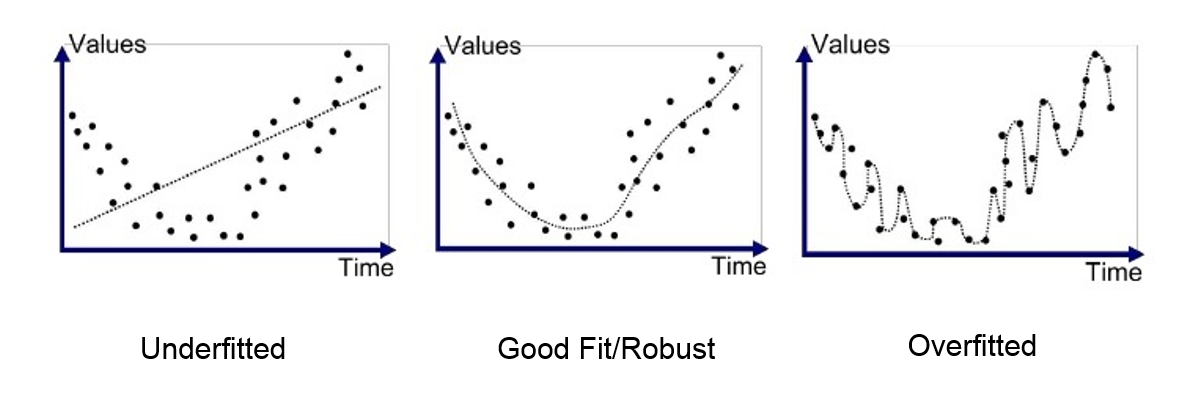

## (Extra) Dados de Treino, Validação, Teste e Inferência

Quando estamos construindo um modelo estatístico ou de machine learning precisamos estimar quão bom ele é, baseado em alguma métrica. Adicionalmente, este teste de “qualidade” deve ser executado em dados que não foram usados na construção do modelo, assim poderemos inferir o comportamento do modelo em dados novos (que nunca foram vistos).


Isso faz todo sentido quanto entendemos o processo como um todo. Veja na figura abaixo os diferentes tipos de dados existentes no processo de modelagem.

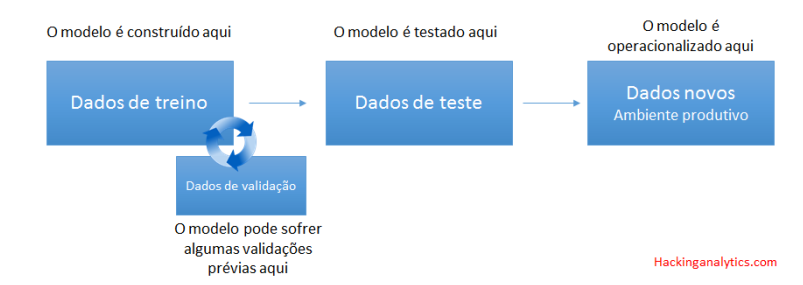

Se um modelo for testado com os dados de treino (os mesmos dados em que foi construído) não podemos generalizar seu resultado para o ambiente de produção, já que não sabemos qual será seu comportamento em dados nunca vistos. É por isso que existe o papel dos dados de teste.

Durante o processo de treino do modelo, ainda é possível dividir os dados de treino em diferentes subconjuntos de dados. Chamamos estes subconjuntos de dados de validação e os utilizamos para fazer validações iniciais durante a aprendizagem do modelo.

É importante garantir que os conjuntos de dados de treino, validação e teste contenham a mesma distribuição dos dados, ou seja, de nada adianta treinar/validar o modelo em um conjunto de dados que não representa o cenário real do problema em estudo.

Chamamos de resampling toda essa organização dos conjuntos de dados. As principais formas resampling são:

* Hold-out validation: Esta é a forma mais simples de separar os dados. Define-se um percentual para cada conjunto de dados (treino, validação e teste) e cria-se as amostras. Geralmente este método é usado quando temos mais dados e conseguimos comprovar que a amostra as amostras criados têm significância estatística para representar a população.

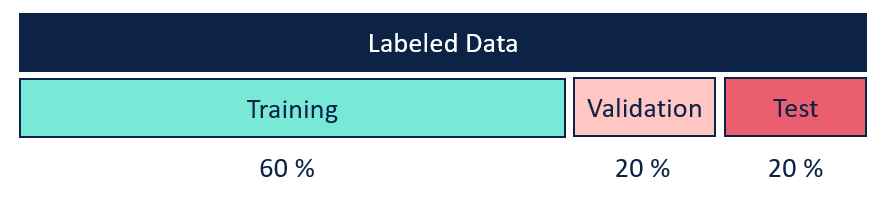

* K-Fold Cross validation: Existem vários tipos de cross validation, porém a mais comum é conhecida como k-fold cross validation. Neste método criamos um número k de amostras, sendo que cada amostra é deixada de lado enquanto o modelo treina com o restante delas. O processo de repete até que seja possível determinar a “qualidade” (depende da métrica em uso) de cada observação (chegando também em uma média geral). Os valores comuns para o número k de amostras são entre 5 e 10.

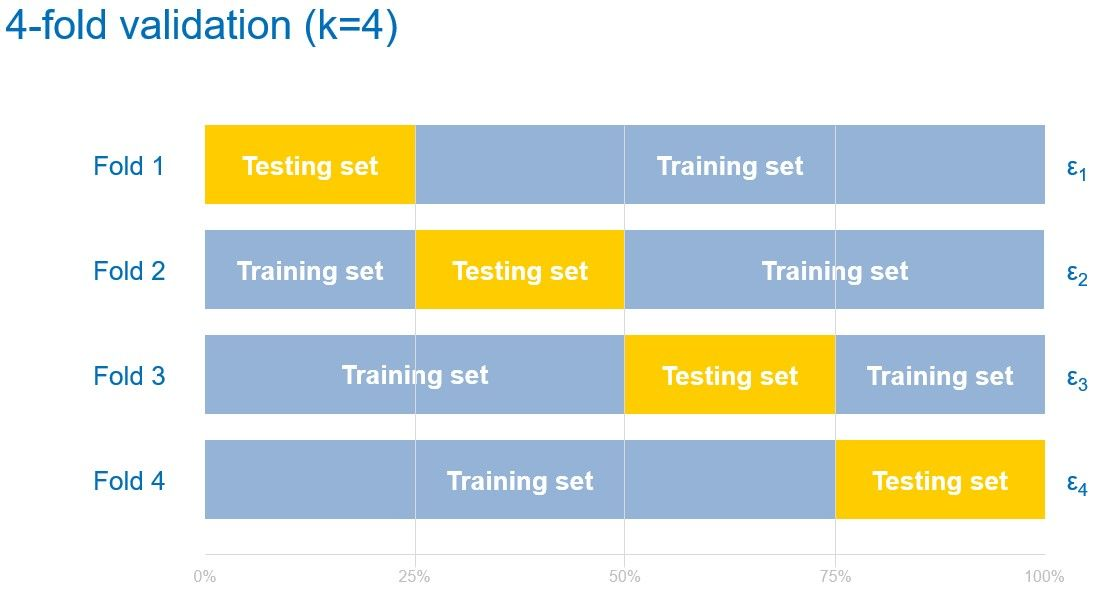

* Stratified K-Fold Cross Validation: Semelhante ao K-Fold Cross Validation porém neste caso o método garante que para todos os grupos de amostras uma variável (normalmente o target) tenha as mesmas proporções.

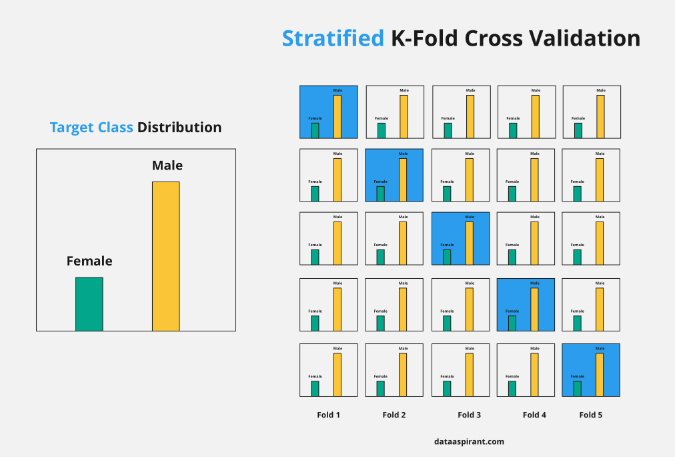

* Leave One Out Cross Validation (LOOCV). Neste método uma observação é deixada de lado e um modelo treina com o restante delas. O processo se repete para todas as observações.

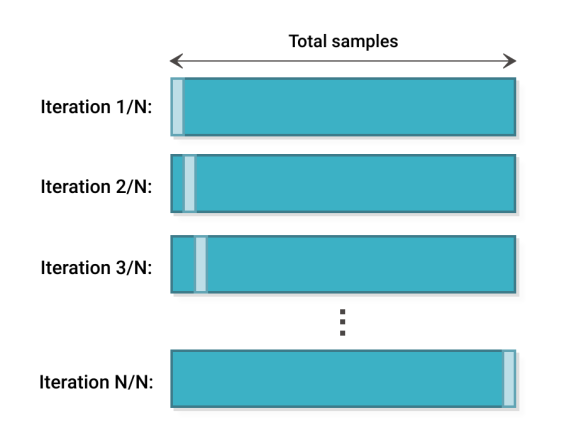

# Viés e Variância

Dados de exemplo:

* Dados verdes: Treino
* Dados azuis: Teste


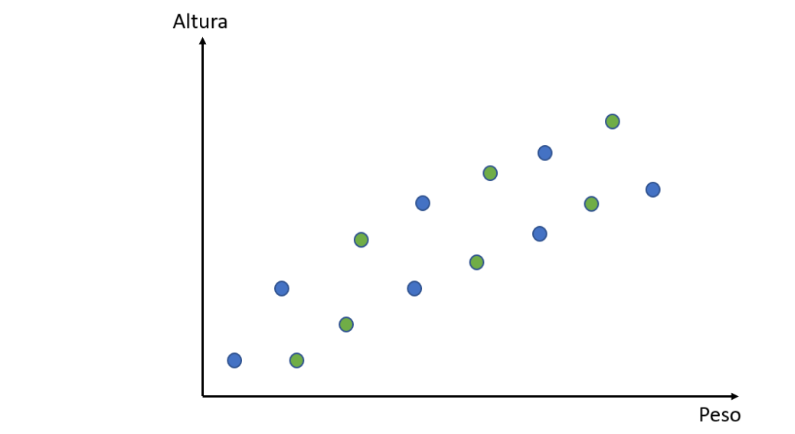

## Viés

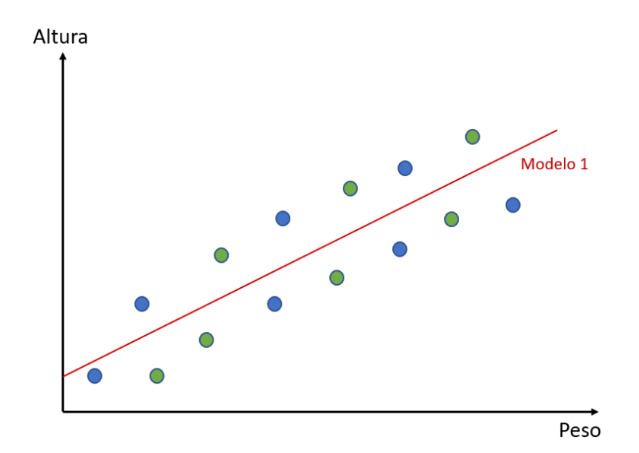


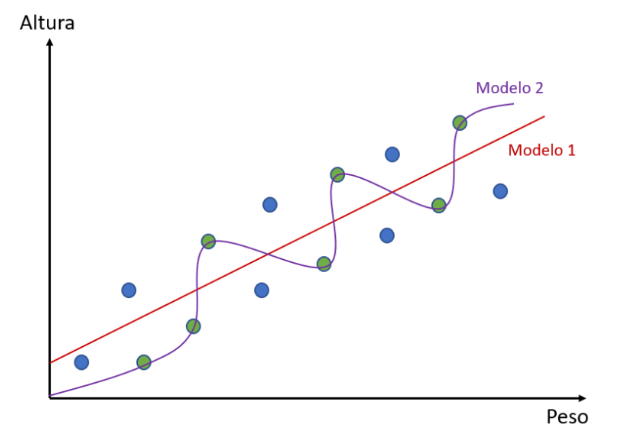

O que seria, então, viés? O conceito de viés, se aplica a flexibilidade de um modelo. Quanto mais alto o viés, menos flexivel é o modelo aos dados de treino. 

Em relação ao nosso exemplo, podemos dizer que o Modelo 2 tem um baixo viés, enquanto o Modelo 1 tem um alto viés. Por quê? Porque o modelo 1 não é um modelo muito flexível: ele não está passando tão próximo dos dados de treino quanto o modelo 2. O Modelo 2 se adequa melhor aos dados de treino do que o Modelo 1 porém os padrões que ele tal modelo 2 encontra no treino não se repetem nos dados de teste.

## Variância

A variância é a sensibilidade de um modelo ao ser usado com outros datasets diferentes do treinamento. Se o modelo é muito sensível aos dados de treinamento, ou seja, identificou tão bem a relação entre os dados de treinamento que quando colocado em teste irá errar justamente a variação que existe entre os datasets.

Em relação ao nosso exemplo, podemos dizer que o Modelo 2 tem uma alta variância, enquanto o Modelo 1 tem uma baixa variância. Por quê? Pelo mesmo motivo acima.

## Conclusão

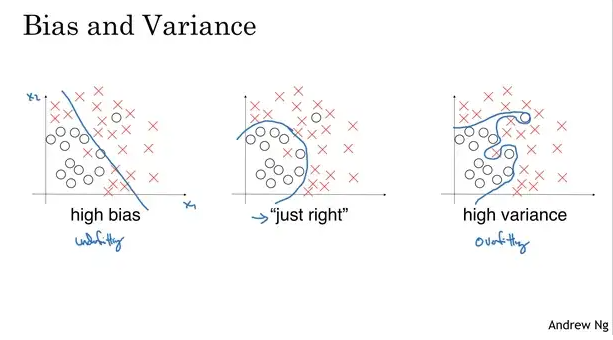

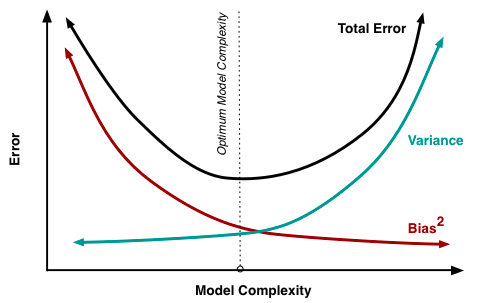

# Criando os Dados

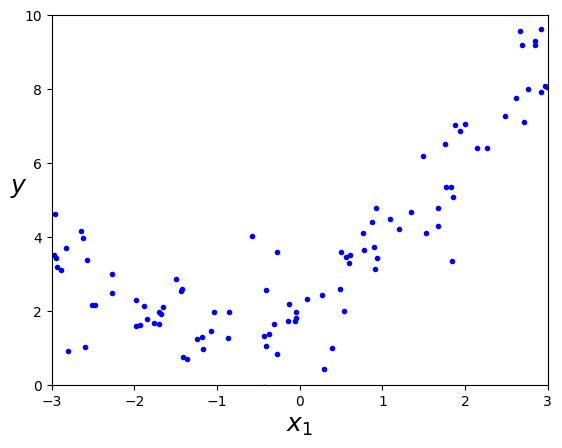

In [2]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()

# Regressão Polinomial

In [3]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [4]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([2.13132622]), array([[1.01770962, 0.48375819]]))

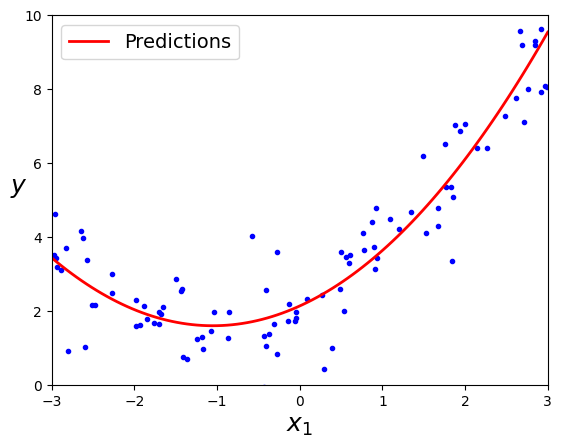

In [5]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
plt.show()

OBS: 

Se atentar ao fato de que o grau d no PolynomialFeatures escala da forma (n+d)! / d!n!, sendo o d o grau e n o número de features. 

Por exemplo: Em um dataset com 5 features utilizando o PolynomialFeatures com grau (degree) = 3 teriamos -> (5+3)! / 5!3! = 54 features. Aumentando o grau de 3 para 5 já seriam 252 features! 

# Curvas de Aprendizado e Trade-off Viés/Variância

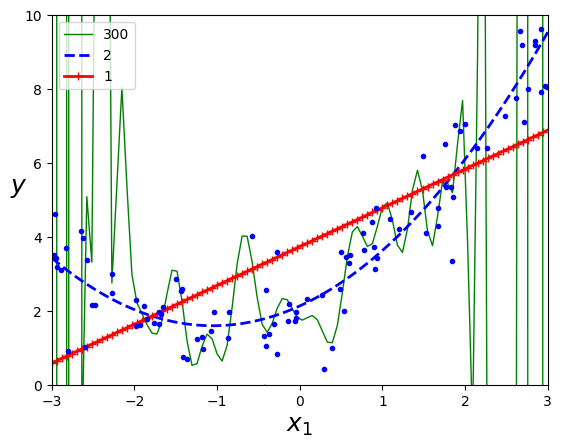

In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

for style, width, degree in (("g-", 1, 300), ("b--", 2, 2), ("r-+", 2, 1)):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig, style, label=str(degree), linewidth=width)

plt.plot(X, y, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()

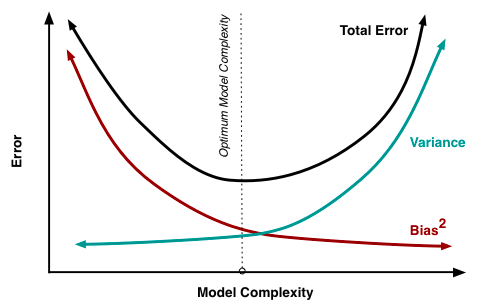

In [170]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

def plot_overfitting(X, y):
    kf = KFold(n_splits=5)

    X_train, y_train = X[:80], y[:80]
    X_test, y_test = X[80:], y[80:]

    # Train a linear regression model on the training data with different polynomial degrees
    train_errors = []
    val_errors = []
    for i in range(1, 30):
        polybig_features = PolynomialFeatures(degree=i, include_bias=False)
        std_scaler = StandardScaler()
        lin_reg = LinearRegression()
        polynomial_regression = Pipeline([
                ("poly_features", polybig_features),
                ("std_scaler", std_scaler),
                ("lin_reg", lin_reg),
            ])
        
        polynomial_regression.fit(X_train, y_train)
        y_train_predict = polynomial_regression.predict(X_train)
        y_test_predict = polynomial_regression.predict(X_test)
        train_errors.append(np.sqrt(mean_squared_error(y_train, y_train_predict)))
        val_errors.append(np.sqrt(mean_squared_error(y_test, y_test_predict)))

    # Plot the train and test scores
    plt.plot(train_errors, label='Train')
    plt.plot(val_errors, label='Test')
    plt.xlabel('Polynomial Degree')
    plt.ylabel('RMSE')
    plt.legend()
    plt.show()
    
def plot_overfitting_with_cross_validation(X, y):
    kf = KFold(n_splits=5)

    # Train a linear regression model on the training data with different polynomial degrees
    val_rmses = []
    for i in range(1, 30):
        polybig_features = PolynomialFeatures(degree=i, include_bias=False)
        std_scaler = StandardScaler()
        lin_reg = LinearRegression()
        polynomial_regression = Pipeline([
                ("poly_features", polybig_features),
                ("std_scaler", std_scaler),
                ("lin_reg", lin_reg),
            ])
        
        val_rmse = np.mean(np.sqrt(-cross_val_score(polynomial_regression, X, y, cv=5, scoring='neg_mean_squared_error')))
        val_rmses.append(val_rmse)

    # Plot the train and test scores
    plt.plot(val_rmses, label='Validation RMSE')
    plt.xlabel('Polynomial Degree')
    plt.ylabel('RMSE')
    plt.legend()
    plt.show()

def plot_learning_curves(X, y, degree=1):

    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=50)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        
        model = Pipeline([
                ("poly_features", PolynomialFeatures(degree=degree, include_bias=False)),
                ("std_scaler", StandardScaler()),
                ("lin_reg", LinearRegression()),
            ])
        model.fit(X_train[:m], y_train[:m])
        
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        
        train_errors.append(np.sqrt(mean_squared_error(y_train[:m], y_train_predict)))
        val_errors.append(np.sqrt(mean_squared_error(y_val, y_val_predict)))
    
    df = pd.DataFrame({
        'Training set size': range(len(train_errors)),
        'train_errors': train_errors,
        'val_errors': val_errors},
    ).set_index('Training set size').round(2)
    
    df.plot()
    plt.legend(loc="upper right", fontsize=14)   
    plt.xlabel("Training set size", fontsize=14) 
    plt.ylabel("RMSE", fontsize=14)
    plt.axis([0, 80, 0, 3])
    plt.show()

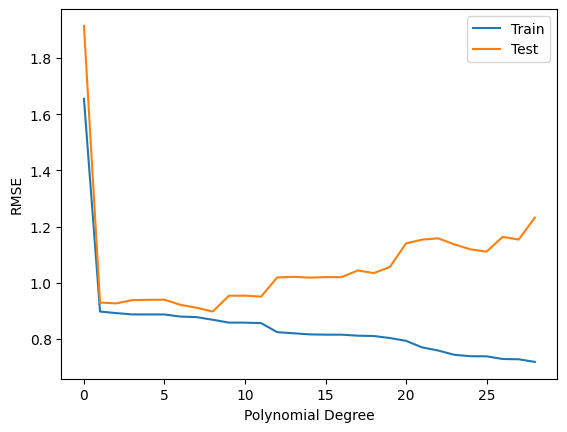

In [160]:
plot_overfitting(X, y)
plt.show()

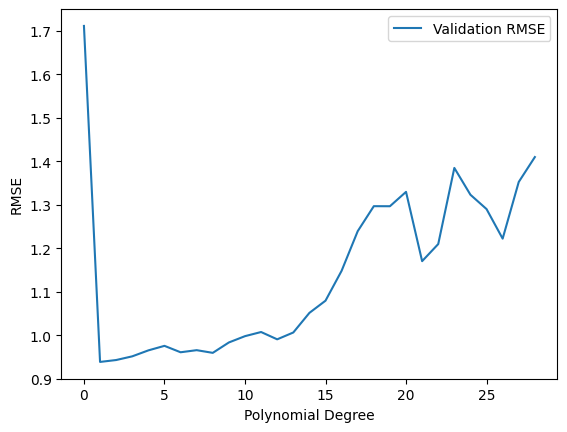

In [161]:
plot_overfitting_with_cross_validation(X, y)
plt.show()

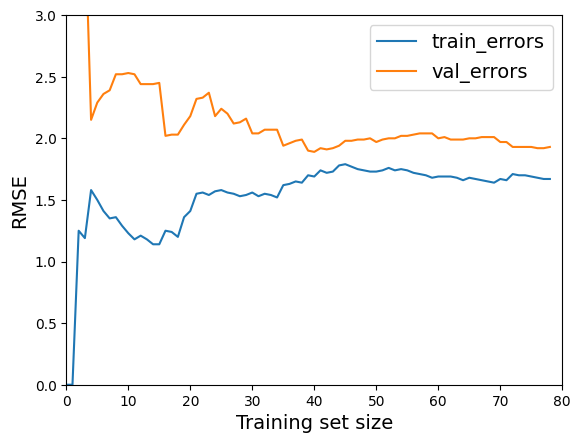

In [181]:
plot_learning_curves(X, y)

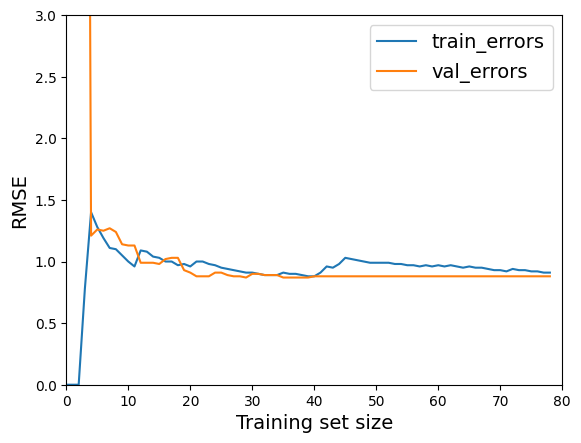

In [182]:
plot_learning_curves(X, y, degree=2)

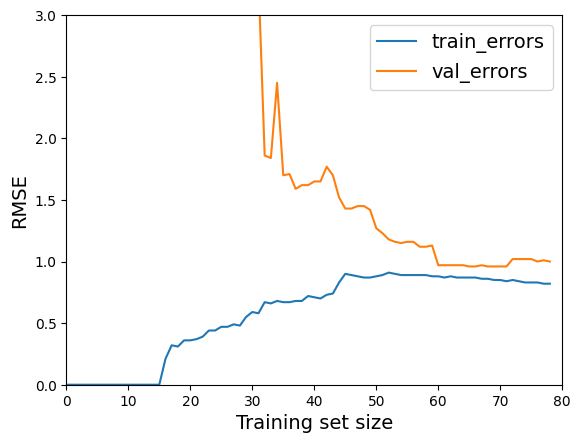

In [183]:
plot_learning_curves(X, y, degree=15)

# Regularização